# Assignment - 1  

##  Source-sink

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 

In [3]:
def point_velocity(x_0,y_0,q):
    x,y=np.mgrid[-2:2:50j,-2:2:50j]
    X_0=x_0*np.ones_like(x)
    Y_0=y_0*np.ones_like(y)

    c = q/(2*np.pi)
    r_inv_sqr = 1/((x-X_0)*(x-X_0)
                   + (y-Y_0)*(y-Y_0))
    u = c*r_inv_sqr*(x-X_0)
    v = c*r_inv_sqr*(y-Y_0)
    return u,v
 
def point_potential(x_0,y_0,q):
    x,y=np.mgrid[-2:2:50j,-2:2:50j]
    X_0=x_0*np.ones_like(x)
    Y_0=y_0*np.ones_like(y)
    c = q/(2*np.pi)
    r=np.log(np.sqrt((x-X_0)*(x-X_0) + (y-Y_0)*(y-Y_0)))
    pot=c*r
    return pot
            

In [4]:
def freestream(u_0,v_0):
    x,y=np.mgrid[-2:2:50j,-2:2:50j]
    u=u_0* np.ones_like(x)
    v=v_0* np.ones_like(y)
    return u,v
 
def freestream_potential(u_0,v_0):
    x,y=np.mgrid[-2:2:50j,-2:2:50j]
    return u_0*x + v_0*y

In [5]:
def pointsource_sink_vel(r,t):
    eps=0.05
    if (r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1])>eps:
        u_so=(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*(r[0]+0.5)
        v_so=(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*r[1]
        u_si=(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*(r[0]-0.5)
        v_si=(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*r[1]
    else:
        u_si,u_so=0,0
        v_si,v_so=0,0
        
    return np.array([u_so+u_si,v_si+v_so])   

In [6]:
def vel1(x1,y1,q1,x2,y2,q2):
    U1,V1=point_velocity(x1,y1,q1)
    U2,V2=point_velocity(x2,y2,q2)
    return U1+U2,V1+V2
def pot1(x1,y1,q1,x2,y2,q2):
    p1=point_potential(x1,y1,q1)
    p2=point_potential(x2,y2,q2)
    return p1+p2

### Point source + Point sink

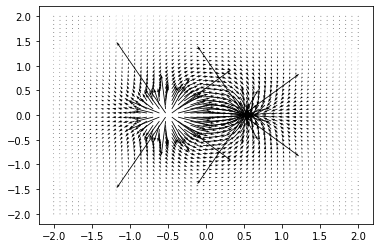

In [7]:
x,y=np.mgrid[-2:2:50j,-2:2:50j]
u1,v1=vel1(-0.5,0,1,0.5,0,-1)
p1=pot1(-0.5,0,1,0.5,0,-1)
plt.quiver(x,y,u1,v1);

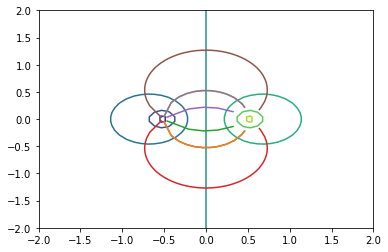

In [8]:
# plt.quiver(x,y,u1,v1);
plt.contour(x,y,p1)
eps=0.05
points=[-1*eps,-1*eps/np.sqrt(2),eps/np.sqrt(2),eps]
times=np.linspace(0,1000,3200)
for i in points:
    ic=np.array([-0.5+np.sqrt(eps*eps-i*i),i])
    sol=odeint(pointsource_sink_vel,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)
    ic=np.array([-0.5-np.sqrt(eps*eps-i*i),i])
    sol=odeint(pointsource_sink_vel,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)

In [9]:
def vel2(x1,y1,q1,x2,y2,q2,u,v):
    U1,V1=point_velocity(x1,y1,q1)
    U2,V2=point_velocity(x2,y2,q2)
    U3,V3=freestream(u,v)
    return U1+U2+U3,V1+V2+V3
def pot2(x1,y1,q1,x2,y2,q2,u,v):
    p1=point_potential(x1,y1,q1)
    p2=point_potential(x2,y2,q2)
    p3=freestream_potential(u,v)
    return p1+p2+p3

### Freestream+ Point source + point sink of equal strength

In [10]:
u2,v2=vel2(0.5,0,-1,-0.5,0,1,1,0)
p2=pot2(0.5,0,-1,-0.5,0,1,1,0)

In [11]:
q1,q2=1,1
def velocity(r,t):
    eps=0.01
    if (r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1])>eps:
        u_so=q1*(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*(r[0]+0.5)
        u_f=1
        v_so=q1*(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*r[1]
        v_f=0
        u_si=q2*(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*(r[0]-0.5)
        v_si=q2*(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*r[1]
    else:
        u_si,u_so,u_f=0,0,0
        v_si,v_so,v_f=0,0,0
        
    return np.array([u_so+u_si+u_f,v_si+v_so+v_f])   

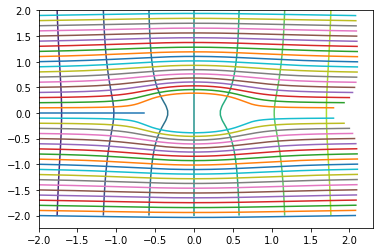

In [32]:
x2,y2=np.mgrid[-2:2:50j,-2:2:50j]
# plt.quiver(x2,y2,u2,v2)
plt.contour(x2,y2,p2)#potential lines
for i in range(40):
    ic=np.array([-2,-2+0.1*i])
    times= np.linspace(0,4,500)
    sol=odeint(velocity,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)#streamlines 


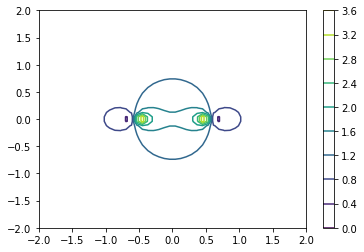

In [14]:
sp=np.sqrt((u2*u2)+(v2*v2))
plt.contour(x2,y2,sp);#iso-velocity magnitude contour
plt.colorbar();

Max. velocity is found near source/sink, which is close to infinity in the 'object'.
Max. velocity is freestream velocity at infinity outside the 'object'.
Min. velocity is zero at the 'boundary' of the 'object'

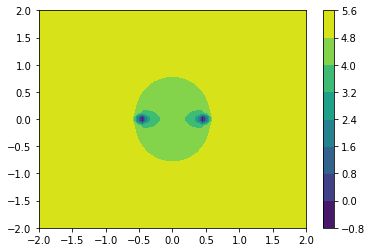

In [15]:
free_pressure=5#freestream pressure at infinitely far-away point
density=1#Density of fluid be 1 
press=0.5*(np.ones_like(x)-sp*sp)+free_pressure
plt.contourf(x2,y2,press); #pressure field
plt.colorbar();

### Freestream + Point-sink + Point-source of unequal strength

In [16]:
u3,v3=vel2(0.5,0,-1.5,-0.5,0,0.5,1,0)
p3=pot2(0.5,0,-1.5,-0.5,0,0.5,1,0)

In [17]:
def velocity1(r,t):
    eps=0.01
    if (r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1])>eps:
        u_so=0.5*(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*(r[0]+0.5)
        u_f=1
        v_so=0.5*(1/(2*np.pi*((r[0]+0.5)*(r[0]+0.5)+(r[1]*r[1]))))*r[1]
        v_f=0
        u_si=1.5*(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*(r[0]-0.5)
        v_si=1.5*(-1/(2*np.pi*((r[0]-0.5)*(r[0]-0.5)+(r[1]*r[1]))))*r[1]
    else:
        u_so,u_si,u_f=0,0,0
        v_si,v_so,v_f=0,0,0
        
    return np.array([u_so+u_si+u_f,v_si+v_so+v_f])  

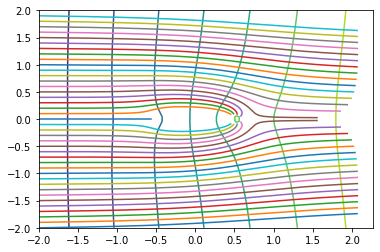

In [23]:
x2,y2=np.mgrid[-2:2:50j,-2:2:50j]
# plt.quiver(x2,y2,u3,v3)
plt.contour(x2,y2,p3)#potential lines
for i in range(40):
    ic=np.array([-2,-2+0.1*i])
    times= np.linspace(0,4,500)
    sol=odeint(velocity1,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)#streamlines
    


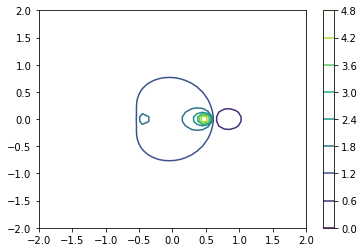

In [60]:
sp=np.sqrt((u3*u3)+(v3*v3))
plt.contour(x2,y2,sp);#iso-velocity magnitude contour
plt.colorbar();

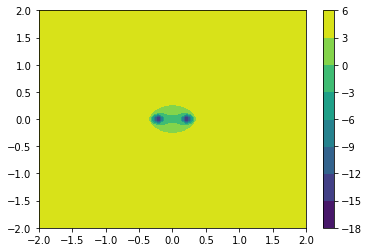

In [95]:
free_pressure=5
density=1
press=0.5*density*(np.ones_like(x)-sp*sp)+free_pressure
plt.contourf(x2,y2,press) #pressure field
plt.colorbar();

### Doublet + Freestream  

In [48]:
x4,y4=np.mgrid[-2:2:50j,-2:2:50j]

In [49]:
def doublet_pot(mu):
    r=np.sqrt(x4*x4+y4*y4)
    p=(mu/(2*np.pi*r*r))*x4
    return p

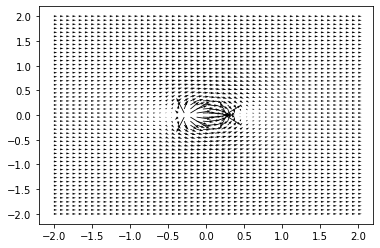

In [90]:
# mu=1 q1=1,q2=-1,x1=-0.5.x2=0.5  first case
# mu=1 q1=2,q2=-2,x1=-0.25,x2=0.25 
u4,v4=vel2(0.25,0,-2,-0.25,0,2,1,0)
def pot3(u_f,v_f,mu):
    p1=freestream_potential(u_f,v_f)
    p2=doublet_pot(1)
    return p1+p2
plt.quiver(x4,y4,u4,v4);

In [91]:
def velocity4(r,t):
    eps=0.01
    if (r[0]-0.25)*(r[0]-0.25)+(r[1]*r[1])>eps:
        u_so=2*(1/(2*np.pi*((r[0]+0.25)*(r[0]+0.25)+(r[1]*r[1]))))*(r[0]+0.25)
        u_f=1
        v_so=2*(1/(2*np.pi*((r[0]+0.25)*(r[0]+0.25)+(r[1]*r[1]))))*r[1]
        v_f=0
        u_si=2*(-1/(2*np.pi*((r[0]-0.25)*(r[0]-0.25)+(r[1]*r[1]))))*(r[0]-0.25)
        v_si=2*(-1/(2*np.pi*((r[0]-0.25)*(r[0]-0.25)+(r[1]*r[1]))))*r[1]
    else:
        u_so,u_si,u_f=0,0,0
        v_si,v_so,v_f=0,0,0
        
    return np.array([u_so+u_si+u_f,v_si+v_so+v_f])  

In [ ]:
p4=pot3(1,0,1)
# plt.contour(x4,y4,p4);

for i in range(32):                                #q=2,eps=0.5
    ic=np.array([-2,-2+0.125*i])
    times= np.linspace(0,4,500)
    sol=odeint(velocity4,ic,times)
    sx,sy=sol.T
    plt.plot(sx,sy)#streamlines

#for i in range(32):                               #q=1,eps=1
#     ic=np.array([-2,-2+0.125*i])
#     times= np.linspace(0,4,500)
#     sol=odeint(velocity,ic,times)
#     sx,sy=sol.T
#     plt.plot(sx,sy)#streamlines
    

There is almost no difference in streamlines upon changing the strength of the source/sink

In [ ]:
sp4=np.sqrt((u4*u4)+(v4*v4))
plt.subplot(1,2,1)                                    #q=2,eps=0.5
plt.contour(x4,y4,sp4);#iso-velocity magnitude contour
plt.colorbar();
plt.subplot(1,2,2)                                    #q=1,eps=1
sp=np.sqrt((u2*u2)+(v2*v2))
plt.contour(x2,y2,sp);#iso-velocity magnitude contour
plt.colorbar();

At the same point in space, the velocity increased as strength of the source/sink increased 

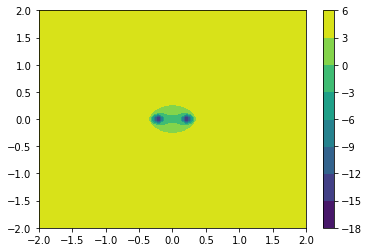

In [97]:
free_pressure4=5
density4=1
press4=0.5*density4*(np.ones_like(x)-sp4*sp4)+free_pressure4
plt.contourf(x4,y4,press4) #pressure field
plt.colorbar();

At the same point, the pressure decreased as the strength increased